# [지도 학습]

## 4. Logistic Regression & Linear Regression

### 1) Logistic Regression

In [1]:
# 라이브러리 호출 및 데이터 준비
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

print("Image Data Shape: ", digits.data.shape) # 8x8 이미지의 64차원
print("Label Data Shape: ", digits.target.shape)

Image Data Shape:  (1797, 64)
Label Data Shape:  (1797,)


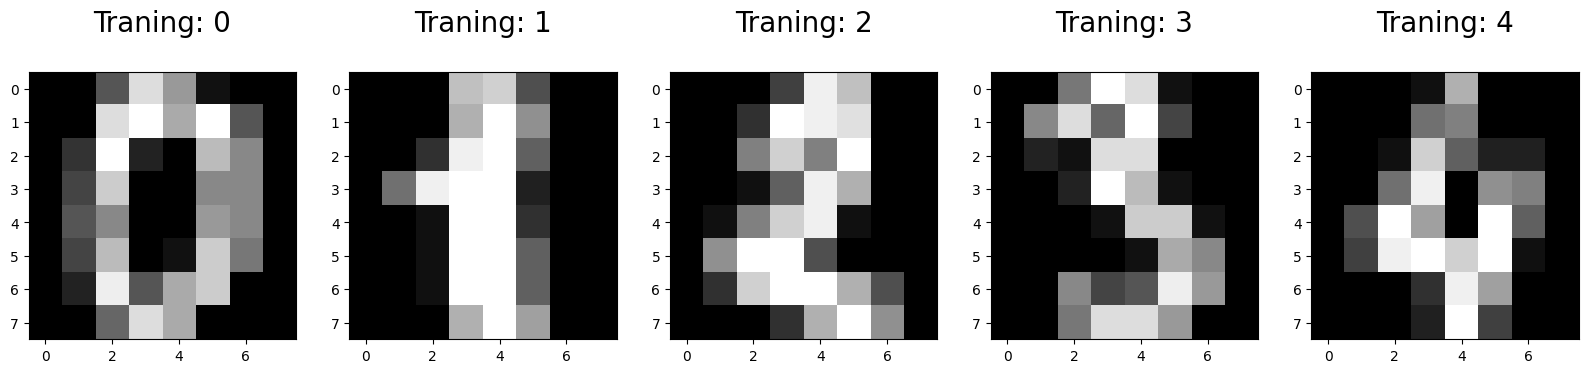

In [2]:
# digits 데이터셋의 시각화
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])): # 이미지 5개만 확인
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title("Traning: %i\n" % label, fontsize=20)

In [3]:
# 훈련과 테스트 데이터셋 분리 및 로지스틱 회귀 모델 생성
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\AIFFEL\miniconda3\envs\torch_book\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
x_train.shape

(1347, 64)

In [13]:
x_test[0]

array([ 0.,  0., 11., 16., 15.,  3.,  0.,  0.,  0.,  5., 16., 12., 11.,
       13.,  0.,  0.,  0.,  3., 13.,  1.,  5., 15.,  0.,  0.,  0.,  0.,
        0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
        0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 12., 16.,
       16., 11.,  1.,  0.,  0.,  0., 13., 13.,  8., 13., 16.,  8.])

In [11]:
x_test[0].shape

(64,)

In [14]:
x_test[0].reshape(1, -1)

array([[ 0.,  0., 11., 16., 15.,  3.,  0.,  0.,  0.,  5., 16., 12., 11.,
        13.,  0.,  0.,  0.,  3., 13.,  1.,  5., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
         0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 12., 16.,
        16., 11.,  1.,  0.,  0.,  0., 13., 13.,  8., 13., 16.,  8.]])

In [12]:
x_test[0].reshape(1, -1).shape

(1, 64)

In [7]:
# 일부 데이터를 사용한 모델 예측
logisticRegr.predict(x_test[0].reshape(1, -1))

array([2])

In [8]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [15]:
# 전체 데이터를 사용한 모델 예측
predictions = logisticRegr.predict(x_test) # 전체 데이터셋에 대한 예측
score = logisticRegr.score(x_test, y_test) # 스코어 메소드를 이용한 성능 측정
score

0.9511111111111111

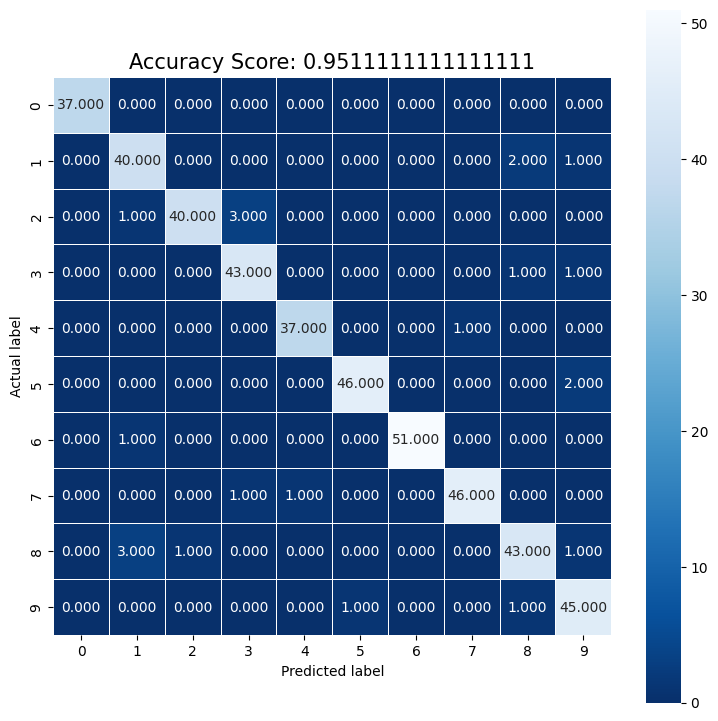

In [16]:
# 혼동 행렬 시각화
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size=15)
plt.show()

In [19]:
type(cm)

numpy.ndarray

In [18]:
cm.shape

(10, 10)

In [20]:
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 40,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450

